In this notebook, we tackle a fun yet powerful challenge: **teaching a machine to recognize Arnold Schwarzenegger** among a dataset of faces. 💪  

By building a complete **machine learning pipeline** with **Python + scikit-learn**

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Read the csv file
df = pd.read_csv("/kaggle/input/faces-dataset/lfw_arnie_nonarnie.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,...,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,...,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,...,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,...,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,...,0.034412,0.265141,0.226000,0.032064,-0.113654,0.059126,-0.216803,0.025849,0.020456,1


In [3]:
# Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Columns: 151 entries, 0 to Label
dtypes: float64(150), int64(1)
memory usage: 224.3 KB


In [4]:
# Check missing values
df.isna().any()

0        False
1        False
2        False
3        False
4        False
         ...  
146      False
147      False
148      False
149      False
Label    False
Length: 151, dtype: bool

In [5]:
# Check label count
df["Label"].value_counts()

Label
0    150
1     40
Name: count, dtype: int64

In [6]:
# Seperate the predictor and class label
X = df.drop('Label', axis=1)
y = df['Label'] 

# Split the data into training and testing sets using stratify to balance the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [7]:
# Import the models you want to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Store initialized models in a dictionary
# This approach allows for easy expansion and comparison of different models
models = {"LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier()}

In [9]:
# Store the model parameters in a dictionary
# Parameters are tailored to each model to explore a range of options during Grid Search
param_grid = {"LogisticRegression": {"LogisticRegression__C": [0.01, 0.1, 1, 10]},
              "KNeighborsClassifier": {"KNeighborsClassifier__n_neighbors": range(1,10)},
              "DecisionTreeClassifier": {"DecisionTreeClassifier__max_depth": [2, 5, 10],
           "DecisionTreeClassifier__min_samples_split": [2, 5, 10, 20],
           "DecisionTreeClassifier__random_state": [42]}}

In [10]:
# Define cross-validation parameters
# KFold is used here to ensure that our model generalizes well on unseen data
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Prepare to collect Grid Search CV results
# Grid Search helps find the best parameter combination for each model
pipe_accuracies = {}
pipe_params = {}
pipelines = {}

In [11]:
# Create separate pipelines for each model, loop through the models and perform GridSearchCV
# Grid Search helps find the best parameter combination for each model
# Pipelines integrate preprocessing (e.g., scaling) with the model for cleaner code and to prevent data leakage
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        (name, model)
    ])
    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring="accuracy")
    
    # Perform grid search and fit the model and store the results
    grid_search.fit(X_train, y_train)
    pipe_accuracies[name] = grid_search.best_score_
    pipe_params[name] = grid_search.best_params_
    pipelines[name] = grid_search

In [12]:
# Select the best model based on the best cross-validation score
best_model_name = max(pipe_accuracies)
best_model_cv_score = max(pipe_accuracies.values())
best_model_info = pipe_params[best_model_name]

# Print the best model name, parameters, and CV score
print(f"Best Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Best Model CV Score: {best_model_cv_score}")


Best Model: LogisticRegression
Best Model Parameters: {'LogisticRegression__C': 1}
Best Model CV Score: 0.8288172043010752


In [13]:
# Compute and print key performance metrics
# These metrics help us understand the model's effectiveness in classification
y_pred = pipelines[best_model_name].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8158
Precision: 1.0000
Recall: 0.1250
F1 Score: 0.2222


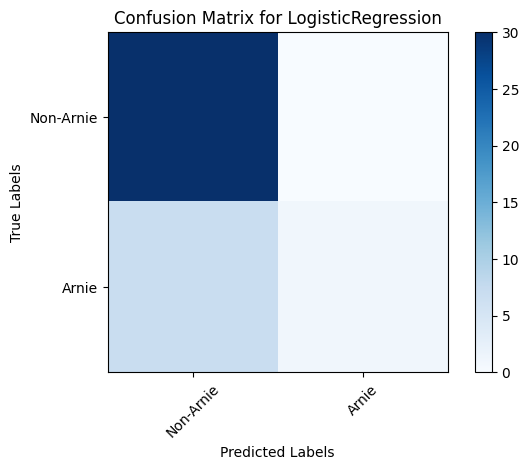

In [14]:
# Visualize the confusion matrix using Matplotlib
# This helps in understanding how well the model is predicting each class
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Arnie', 'Arnie'], rotation=45)
plt.yticks(tick_marks, ['Non-Arnie', 'Arnie'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()